In [1]:
import os
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

# E0

In [50]:
folder = 'EnergySplit/E0/'
i = 0
for file in os.listdir(folder):
    if file.startswith('pos'):
        i+=1
print(i)

48872


In [51]:
E0 = np.empty((97744, 100, 1), dtype=cp.float64)
labels_E0 = np.zeros(97744)
folder = 'EnergySplit/E0/'
i = 0
j = 0
for file in os.listdir(folder):
    if file.startswith('el') and j < 48872:
        labels_E0[i] = 1
        array = np.load(folder + file)
        array = cp.reshape(array, (100,1))
        E0[i] = array
        i += 1
        j += 1
    elif file.startswith('pos'):
        array = np.load(folder + file)
        array = cp.reshape(array, (100,1))
        E0[i] = array
        i += 1

In [52]:
E0[97743]

array([[15.],
       [45.],
       [47.],
       [48.],
       [58.],
       [50.],
       [45.],
       [42.],
       [44.],
       [43.],
       [41.],
       [36.],
       [41.],
       [32.],
       [33.],
       [28.],
       [39.],
       [27.],
       [22.],
       [28.],
       [34.],
       [23.],
       [22.],
       [16.],
       [34.],
       [22.],
       [19.],
       [23.],
       [25.],
       [25.],
       [23.],
       [24.],
       [15.],
       [26.],
       [24.],
       [13.],
       [15.],
       [17.],
       [12.],
       [11.],
       [20.],
       [24.],
       [17.],
       [16.],
       [15.],
       [21.],
       [23.],
       [21.],
       [18.],
       [20.],
       [14.],
       [10.],
       [12.],
       [ 5.],
       [ 8.],
       [ 6.],
       [ 9.],
       [ 9.],
       [10.],
       [10.],
       [ 5.],
       [13.],
       [ 3.],
       [ 5.],
       [ 2.],
       [ 1.],
       [ 3.],
       [ 7.],
       [ 2.],
       [ 3.],
       [ 6.],
      

In [53]:
E0 = E0/E0.max()

In [54]:
from sklearn.model_selection import train_test_split
E0X_train, E0X_test, E0Y_train, E0Y_test = train_test_split(E0 , labels_E0 ,test_size=0.2)

In [193]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model = Sequential()
model.add(Flatten(input_shape=(100,1)))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [194]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [195]:
history = model.fit(E0X_train, E0Y_train, batch_size=64, validation_data=(E0X_test, E0Y_test), epochs=30)

Train on 78195 samples, validate on 19549 samples
Epoch 1/30
78195/78195 [==============================] - 4s 45us/step - loss: 0.6336 - accuracy: 0.6054 - val_loss: 0.5881 - val_accuracy: 0.6698
Epoch 2/30
78195/78195 [==============================] - 3s 34us/step - loss: 0.5667 - accuracy: 0.6987 - val_loss: 0.5412 - val_accuracy: 0.7194
Epoch 3/30
78195/78195 [==============================] - 3s 38us/step - loss: 0.5273 - accuracy: 0.7317 - val_loss: 0.5129 - val_accuracy: 0.7429
Epoch 4/30
78195/78195 [==============================] - 3s 36us/step - loss: 0.5067 - accuracy: 0.7432 - val_loss: 0.4996 - val_accuracy: 0.7508
Epoch 5/30
78195/78195 [==============================] - 3s 36us/step - loss: 0.4967 - accuracy: 0.7513 - val_loss: 0.4927 - val_accuracy: 0.7537
Epoch 6/30
78195/78195 [==============================] - 3s 33us/step - loss: 0.4900 - accuracy: 0.7543 - val_loss: 0.4877 - val_accuracy: 0.7577
Epoch 7/30
78195/78195 [==============================] - 3s 37us/st

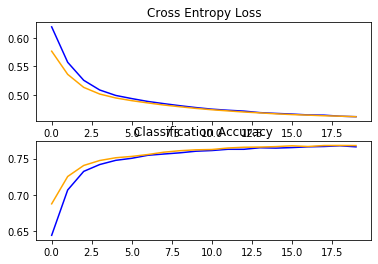

In [61]:
summarize_diagnostics(history)

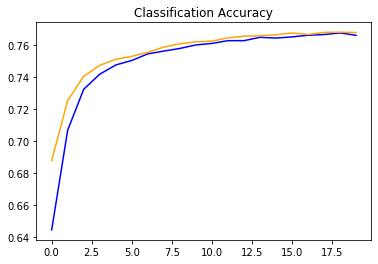

In [71]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [182]:
history.history['accuracy'].insert(0, 0.5)
history.history['val_accuracy'].insert(0, 0.5)

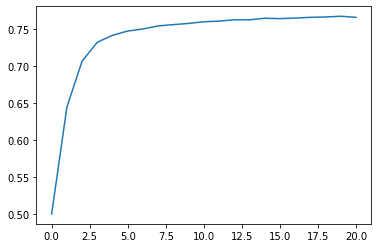

In [192]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.grid()
plt.legend()

In [78]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=(100,1)))
model_1.add(BatchNormalization())
model_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dense(1, activation='sigmoid'))

In [79]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [80]:
history_1 = model_1.fit(E0X_train, E0Y_train, batch_size=64, validation_data=(E0X_test, E0Y_test), epochs=30)

Train on 78195 samples, validate on 19549 samples
Epoch 1/30
78195/78195 [==============================] - 4s 48us/step - loss: 0.5745 - accuracy: 0.6828 - val_loss: 0.5080 - val_accuracy: 0.7363
Epoch 2/30
78195/78195 [==============================] - 3s 43us/step - loss: 0.4903 - accuracy: 0.7492 - val_loss: 0.4746 - val_accuracy: 0.7566
Epoch 3/30
78195/78195 [==============================] - 3s 42us/step - loss: 0.4714 - accuracy: 0.7604 - val_loss: 0.4652 - val_accuracy: 0.7611
Epoch 4/30
78195/78195 [==============================] - 3s 41us/step - loss: 0.4638 - accuracy: 0.7648 - val_loss: 0.4603 - val_accuracy: 0.7629
Epoch 5/30
78195/78195 [==============================] - 3s 42us/step - loss: 0.4587 - accuracy: 0.7671 - val_loss: 0.4572 - val_accuracy: 0.7637
Epoch 6/30
78195/78195 [==============================] - 3s 43us/step - loss: 0.4560 - accuracy: 0.7680 - val_loss: 0.4541 - val_accuracy: 0.7658
Epoch 7/30
78195/78195 [==============================] - 3s 41us/st

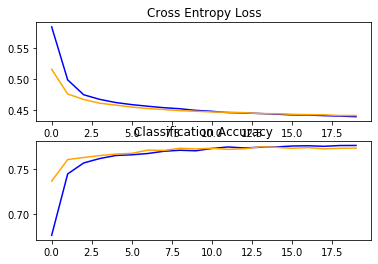

In [76]:
summarize_diagnostics(history_1)

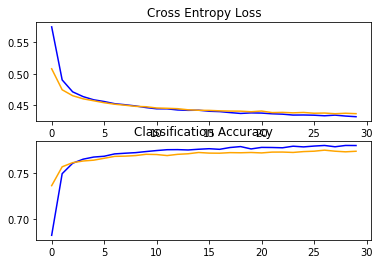

In [81]:
summarize_diagnostics(history_1)

In [196]:
history_1.history['accuracy'].insert(0, 0.5)
history_1.history['val_accuracy'].insert(0, 0.5)

In [208]:
x = np.linspace(-2, 32)
y = 0*x +0.5

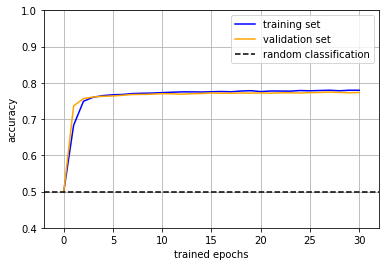

In [222]:
#plt.title('Classification Accuracy')
fig = plt.figure()
ax = fig.subplots()
ax.set_ylabel('accuracy')
ax.set_xlabel('trained epochs')
plt.plot(history_1.history['accuracy'], color='blue', label='training set')
plt.plot(history_1.history['val_accuracy'], color='orange', label='validation set')
plt.plot(x, y, '--', color='black', label='random classification' )
plt.grid()
plt.legend()
axes = plt.gca()
axes.set_xlim([-2,32])
axes.set_ylim([0.4,1])
#plt.savefig('/home/centos/accuracy.pdf')

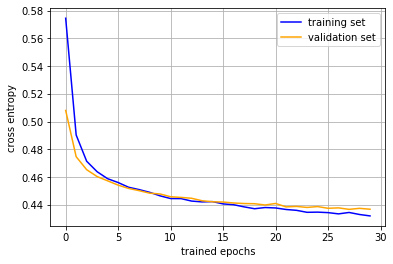

In [223]:
#plt.title('Classification Accuracy')
fig = plt.figure()
ax = fig.subplots()
ax.set_ylabel('cross entropy')
ax.set_xlabel('trained epochs')
plt.plot(history_1.history['loss'], color='blue', label='training set')
plt.plot(history_1.history['val_loss'], color='orange', label='validation set')
#plt.plot(x, y, '--', color='black', label='random classification' )
plt.grid()
plt.legend()
#axes = plt.gca()
#axes.set_xlim([-2,32])
#axes.set_ylim([0.4,1])
#plt.savefig('/home/centos/loss.pdf')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization
from keras import regularizers

model0 = Sequential()
model0.add(Conv1D(32, 100, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 1)))
model0.add(MaxPooling1D(2))
model0.add(BatchNormalization())
model0.add(Conv1D(64, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model0.add(MaxPooling1D(2))
model0.add(BatchNormalization())
model0.add(Conv1D(128, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model0.add(MaxPooling1D(2))
model0.add(BatchNormalization())
model0.add(Flatten())
model0.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
model0.add(Dropout(0.3))
model0.add(Dense(1, activation='sigmoid'))

In [66]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model0.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [67]:
history0 = model0.fit(E0X_train, E0Y_train, batch_size=64, validation_data=(E0X_test, E0Y_test), epochs=20)

Train on 78195 samples, validate on 19549 samples
Epoch 1/20
78195/78195 [==============================] - 67s 853us/step - loss: 2.8409 - accuracy: 0.7256 - val_loss: 2.5445 - val_accuracy: 0.7659
Epoch 2/20
78195/78195 [==============================] - 65s 835us/step - loss: 2.3371 - accuracy: 0.7594 - val_loss: 2.1252 - val_accuracy: 0.7663
Epoch 3/20
78195/78195 [==============================] - 65s 826us/step - loss: 1.9588 - accuracy: 0.7682 - val_loss: 1.8027 - val_accuracy: 0.7701
Epoch 4/20
78195/78195 [==============================] - 64s 823us/step - loss: 1.6718 - accuracy: 0.7723 - val_loss: 1.5499 - val_accuracy: 0.7740
Epoch 5/20
78195/78195 [==============================] - 65s 827us/step - loss: 1.4548 - accuracy: 0.7743 - val_loss: 1.3631 - val_accuracy: 0.7745
Epoch 6/20
78195/78195 [==============================] - 65s 834us/step - loss: 1.2852 - accuracy: 0.7774 - val_loss: 1.2191 - val_accuracy: 0.7747
Epoch 7/20
78195/78195 [==============================] 

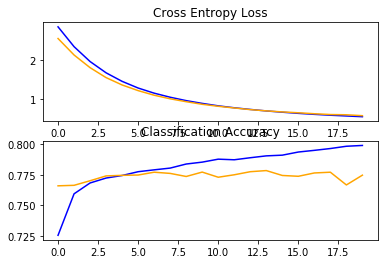

In [68]:
summarize_diagnostics(history0)

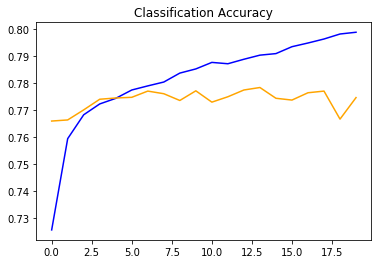

In [70]:
plt.title('Classification Accuracy')
plt.plot(history0.history['accuracy'], color='blue', label='train')
plt.plot(history0.history['val_accuracy'], color='orange', label='test')

# E1

In [84]:
folder = 'EnergySplit/E1/'
i = 0
for file in os.listdir(folder):
        i += 1
print(i)

199600


In [85]:
E1 = np.empty((199600, 100, 1), dtype=cp.float64)
labels_E1 = np.zeros(199600)
folder = 'EnergySplit/E1/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E1[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E1[i] = array
    i += 1

In [86]:
E1 = E1/E1.max()

In [87]:
E1X_train, E1X_test, E1Y_train, E1Y_test = train_test_split(E1 , labels_E1 ,test_size=0.2)

In [88]:
model1_1 = Sequential()
model1_1.add(Flatten(input_shape=(100,1)))
model1_1.add(BatchNormalization())
model1_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model1_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model1_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model1_1.add(Dense(1, activation='sigmoid'))

In [89]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model1_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [90]:
history1_1 = model1_1.fit(E1X_train, E1Y_train, batch_size=64, validation_data=(E1X_test, E1Y_test), epochs=20)

Train on 159680 samples, validate on 39920 samples
Epoch 1/20
159680/159680 [==============================] - 7s 44us/step - loss: 0.6424 - accuracy: 0.6196 - val_loss: 0.6023 - val_accuracy: 0.6724
Epoch 2/20
159680/159680 [==============================] - 6s 41us/step - loss: 0.5929 - accuracy: 0.6820 - val_loss: 0.5880 - val_accuracy: 0.6855
Epoch 3/20
159680/159680 [==============================] - 6s 37us/step - loss: 0.5847 - accuracy: 0.6885 - val_loss: 0.5821 - val_accuracy: 0.6890
Epoch 4/20
159680/159680 [==============================] - 7s 41us/step - loss: 0.5805 - accuracy: 0.6920 - val_loss: 0.5782 - val_accuracy: 0.6921
Epoch 5/20
159680/159680 [==============================] - 7s 44us/step - loss: 0.5771 - accuracy: 0.6951 - val_loss: 0.5762 - val_accuracy: 0.6942
Epoch 6/20
159680/159680 [==============================] - 7s 42us/step - loss: 0.5756 - accuracy: 0.6959 - val_loss: 0.5763 - val_accuracy: 0.6940
Epoch 7/20
159680/159680 [=============================

In [ ]:
# 71

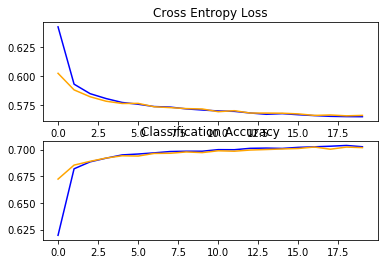

In [91]:
summarize_diagnostics(history1_1)

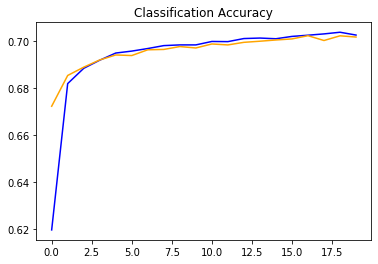

In [92]:
plt.title('Classification Accuracy')
plt.plot(history1_1.history['accuracy'], color='blue', label='train')
plt.plot(history1_1.history['val_accuracy'], color='orange', label='test')

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization
from keras import regularizers

model1 = Sequential()
model1.add(Conv1D(32, 100, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 1)))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Conv1D(64, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Conv1D(128, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))

In [94]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [95]:
history1 = model1.fit(E1X_train, E1Y_train, batch_size=64, validation_data=(E1X_test, E1Y_test), epochs=20)

Train on 159680 samples, validate on 39920 samples
Epoch 1/20
159680/159680 [==============================] - 135s 846us/step - loss: 2.7047 - accuracy: 0.6528 - val_loss: 2.2328 - val_accuracy: 0.6900
Epoch 2/20
159680/159680 [==============================] - 133s 832us/step - loss: 1.9158 - accuracy: 0.6875 - val_loss: 1.6426 - val_accuracy: 0.6938
Epoch 3/20
159680/159680 [==============================] - 134s 841us/step - loss: 1.4673 - accuracy: 0.6958 - val_loss: 1.3189 - val_accuracy: 0.6997
Epoch 4/20
159680/159680 [==============================] - 132s 828us/step - loss: 1.2188 - accuracy: 0.7005 - val_loss: 1.1328 - val_accuracy: 0.6986
Epoch 5/20
159680/159680 [==============================] - 134s 839us/step - loss: 1.0621 - accuracy: 0.7034 - val_loss: 1.0106 - val_accuracy: 0.6959
Epoch 6/20
159680/159680 [==============================] - 132s 826us/step - loss: 0.9530 - accuracy: 0.7057 - val_loss: 0.9133 - val_accuracy: 0.7043
Epoch 7/20
159680/159680 [===========

KeyboardInterrupt: 

# E2

In [96]:
folder = 'EnergySplit/E2/'
i = 0
for file in os.listdir(folder):
        i += 1
print(i)

200223


In [117]:
E2 = np.empty((200223, 100, 1), dtype=cp.float64)
labels_E2 = np.zeros(200223)
folder = 'EnergySplit/E2/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E2[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E2[i] = array
    i += 1

In [118]:
E2 = E2/E2.max()

In [119]:
E2X_train, E2X_test, E2Y_train, E2Y_test = train_test_split(E2 , labels_E2 ,test_size=0.2)

In [120]:
model2_1 = Sequential()
model2_1.add(Flatten(input_shape=(100,1)))
model2_1.add(BatchNormalization())
model2_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model2_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model2_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model2_1.add(Dense(1, activation='sigmoid'))

In [121]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model2_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [122]:
history2_1 = model2_1.fit(E2X_train, E2Y_train, batch_size=64, validation_data=(E2X_test, E2Y_test), epochs=20)

Train on 160178 samples, validate on 40045 samples
Epoch 1/20
160178/160178 [==============================] - 6s 40us/step - loss: 0.6660 - accuracy: 0.5863 - val_loss: 0.6430 - val_accuracy: 0.6254
Epoch 2/20
160178/160178 [==============================] - 6s 36us/step - loss: 0.6329 - accuracy: 0.6391 - val_loss: 0.6261 - val_accuracy: 0.6483
Epoch 3/20
160178/160178 [==============================] - 7s 45us/step - loss: 0.6238 - accuracy: 0.6505 - val_loss: 0.6206 - val_accuracy: 0.6560
Epoch 4/20
160178/160178 [==============================] - 6s 39us/step - loss: 0.6194 - accuracy: 0.6549 - val_loss: 0.6169 - val_accuracy: 0.6604
Epoch 5/20
160178/160178 [==============================] - 7s 42us/step - loss: 0.6163 - accuracy: 0.6578 - val_loss: 0.6155 - val_accuracy: 0.6607
Epoch 6/20
160178/160178 [==============================] - 7s 42us/step - loss: 0.6153 - accuracy: 0.6579 - val_loss: 0.6131 - val_accuracy: 0.6634
Epoch 7/20
160178/160178 [=============================

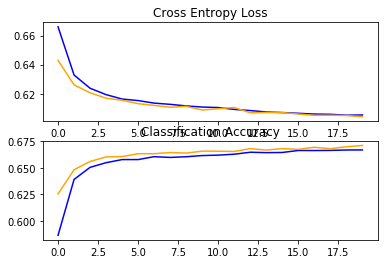

In [123]:
summarize_diagnostics(history2_1)

# E3

In [124]:
folder = 'EnergySplit/E3/'
i = 0
for file in os.listdir(folder):
        i += 1
print(i)

200417


In [125]:
E3 = np.empty((200417, 100, 1), dtype=cp.float64)
labels_E3 = np.zeros(200417)
folder = 'EnergySplit/E3/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E3[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E3[i] = array
    i += 1

In [126]:
E3 = E3/E3.max()

In [127]:
E3X_train, E3X_test, E3Y_train, E3Y_test = train_test_split(E3 , labels_E3 ,test_size=0.2)

In [128]:
model3_1 = Sequential()
model3_1.add(Flatten(input_shape=(100,1)))
model3_1.add(BatchNormalization())
model3_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model3_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model3_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model3_1.add(Dense(1, activation='sigmoid'))

In [129]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model3_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [130]:
history3_1 = model3_1.fit(E3X_train, E3Y_train, batch_size=64, validation_data=(E3X_test, E3Y_test), epochs=20)

Train on 160333 samples, validate on 40084 samples
Epoch 1/20
160333/160333 [==============================] - 7s 41us/step - loss: 0.6734 - accuracy: 0.5744 - val_loss: 0.6569 - val_accuracy: 0.6077
Epoch 2/20
160333/160333 [==============================] - 6s 37us/step - loss: 0.6532 - accuracy: 0.6119 - val_loss: 0.6481 - val_accuracy: 0.6210
Epoch 3/20
160333/160333 [==============================] - 6s 40us/step - loss: 0.6474 - accuracy: 0.6199 - val_loss: 0.6439 - val_accuracy: 0.6261
Epoch 4/20
160333/160333 [==============================] - 6s 36us/step - loss: 0.6440 - accuracy: 0.6243 - val_loss: 0.6424 - val_accuracy: 0.6305
Epoch 5/20
160333/160333 [==============================] - 6s 39us/step - loss: 0.6420 - accuracy: 0.6283 - val_loss: 0.6401 - val_accuracy: 0.6330
Epoch 6/20
160333/160333 [==============================] - 6s 38us/step - loss: 0.6402 - accuracy: 0.6307 - val_loss: 0.6399 - val_accuracy: 0.6336
Epoch 7/20
160333/160333 [=============================

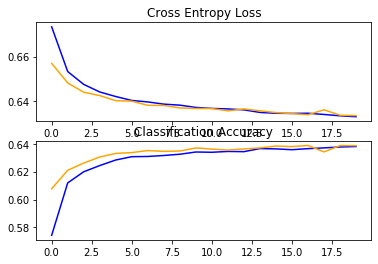

In [131]:
summarize_diagnostics(history3_1)

# E4

In [132]:
folder = 'EnergySplit/E4/'
i = 0
for file in os.listdir(folder):
        i += 1
print(i)

200633


In [133]:
E4 = np.empty((200633, 100, 1), dtype=cp.float64)
labels_E4 = np.zeros(200633)
folder = 'EnergySplit/E4/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E4[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E4[i] = array
    i += 1

In [134]:
E4 = E4/E4.max()

In [135]:
E4X_train, E4X_test, E4Y_train, E4Y_test = train_test_split(E4 , labels_E4 ,test_size=0.2)

In [136]:
model4_1 = Sequential()
model4_1.add(Flatten(input_shape=(100,1)))
model4_1.add(BatchNormalization())
model4_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model4_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model4_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model4_1.add(Dense(1, activation='sigmoid'))

In [139]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model4_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [140]:
history4_1 = model4_1.fit(E4X_train, E4Y_train, batch_size=64, validation_data=(E4X_test, E4Y_test), epochs=20)

Train on 160506 samples, validate on 40127 samples
Epoch 1/20
160506/160506 [==============================] - 7s 42us/step - loss: 0.6798 - accuracy: 0.5629 - val_loss: 0.6689 - val_accuracy: 0.5847
Epoch 2/20
160506/160506 [==============================] - 7s 42us/step - loss: 0.6642 - accuracy: 0.5933 - val_loss: 0.6614 - val_accuracy: 0.5968
Epoch 3/20
160506/160506 [==============================] - 7s 42us/step - loss: 0.6596 - accuracy: 0.6009 - val_loss: 0.6577 - val_accuracy: 0.6022
Epoch 4/20
160506/160506 [==============================] - 6s 39us/step - loss: 0.6571 - accuracy: 0.6052 - val_loss: 0.6555 - val_accuracy: 0.6050
Epoch 5/20
160506/160506 [==============================] - 6s 40us/step - loss: 0.6557 - accuracy: 0.6067 - val_loss: 0.6540 - val_accuracy: 0.6063
Epoch 6/20
160506/160506 [==============================] - 6s 38us/step - loss: 0.6543 - accuracy: 0.6085 - val_loss: 0.6530 - val_accuracy: 0.6083
Epoch 7/20
160506/160506 [=============================

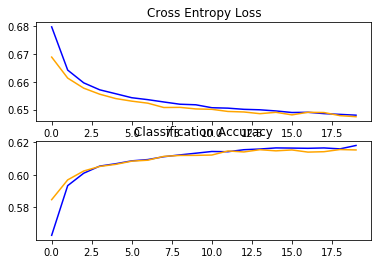

In [141]:
summarize_diagnostics(history4_1)

# E5

In [142]:
folder = 'EnergySplit/E5/'
i = 0
for file in os.listdir(folder):
        i += 1
print(i)

199364


In [143]:
E5 = np.empty((199364, 100, 1), dtype=cp.float64)
labels_E5 = np.zeros(199364)
folder = 'EnergySplit/E5/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E5[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E5[i] = array
    i += 1

In [144]:
E5 = E5/E5.max()

In [145]:
E5X_train, E5X_test, E5Y_train, E5Y_test = train_test_split(E5 , labels_E5 ,test_size=0.2)

In [146]:
model5_1 = Sequential()
model5_1.add(Flatten(input_shape=(100,1)))
model5_1.add(BatchNormalization())
model5_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model5_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model5_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model5_1.add(Dense(1, activation='sigmoid'))

In [147]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model5_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [148]:
history5_1 = model5_1.fit(E5X_train, E5Y_train, batch_size=64, validation_data=(E5X_test, E5Y_test), epochs=20)

Train on 159491 samples, validate on 39873 samples
Epoch 1/20
159491/159491 [==============================] - 6s 37us/step - loss: 0.6885 - accuracy: 0.5468 - val_loss: 0.6769 - val_accuracy: 0.5738
Epoch 2/20
159491/159491 [==============================] - 6s 40us/step - loss: 0.6737 - accuracy: 0.5803 - val_loss: 0.6674 - val_accuracy: 0.5895
Epoch 3/20
159491/159491 [==============================] - 7s 47us/step - loss: 0.6684 - accuracy: 0.5885 - val_loss: 0.6641 - val_accuracy: 0.5964
Epoch 4/20
159491/159491 [==============================] - 7s 43us/step - loss: 0.6664 - accuracy: 0.5920 - val_loss: 0.6627 - val_accuracy: 0.5975
Epoch 5/20
159491/159491 [==============================] - 7s 44us/step - loss: 0.6646 - accuracy: 0.5937 - val_loss: 0.6618 - val_accuracy: 0.5998
Epoch 6/20
159491/159491 [==============================] - 8s 47us/step - loss: 0.6632 - accuracy: 0.5961 - val_loss: 0.6611 - val_accuracy: 0.6002
Epoch 7/20
159491/159491 [=============================

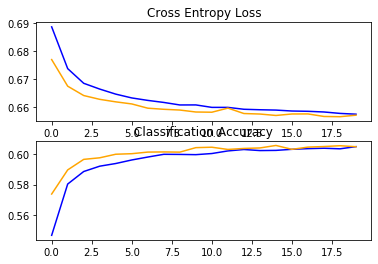

In [149]:
summarize_diagnostics(history5_1)

# E6

In [150]:
folder = 'EnergySplit/E6/'
i = 0
for file in os.listdir(folder):
        i += 1
print(i)

199556


In [151]:
E6 = np.empty((199556, 100, 1), dtype=cp.float64)
labels_E6 = np.zeros(199556)
folder = 'EnergySplit/E6/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E6[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E6[i] = array
    i += 1

In [152]:
E6 = E6/E6.max()

In [153]:
E6X_train, E6X_test, E6Y_train, E6Y_test = train_test_split(E6 , labels_E6 ,test_size=0.2)

In [154]:
model6_1 = Sequential()
model6_1.add(Flatten(input_shape=(100,1)))
model6_1.add(BatchNormalization())
model6_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model6_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model6_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model6_1.add(Dense(1, activation='sigmoid'))

In [155]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model6_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [156]:
history6_1 = model6_1.fit(E6X_train, E6Y_train, batch_size=64, validation_data=(E6X_test, E6Y_test), epochs=20)

Train on 159644 samples, validate on 39912 samples
Epoch 1/20
159644/159644 [==============================] - 7s 41us/step - loss: 0.6863 - accuracy: 0.5472 - val_loss: 0.6782 - val_accuracy: 0.5721
Epoch 2/20
159644/159644 [==============================] - 6s 41us/step - loss: 0.6762 - accuracy: 0.5729 - val_loss: 0.6710 - val_accuracy: 0.5811
Epoch 3/20
159644/159644 [==============================] - 7s 42us/step - loss: 0.6717 - accuracy: 0.5796 - val_loss: 0.6688 - val_accuracy: 0.5852
Epoch 4/20
159644/159644 [==============================] - 7s 41us/step - loss: 0.6698 - accuracy: 0.5821 - val_loss: 0.6673 - val_accuracy: 0.5888
Epoch 5/20
159644/159644 [==============================] - 7s 43us/step - loss: 0.6682 - accuracy: 0.5849 - val_loss: 0.6663 - val_accuracy: 0.5897
Epoch 6/20
159644/159644 [==============================] - 6s 40us/step - loss: 0.6676 - accuracy: 0.5861 - val_loss: 0.6659 - val_accuracy: 0.5910
Epoch 7/20
159644/159644 [=============================

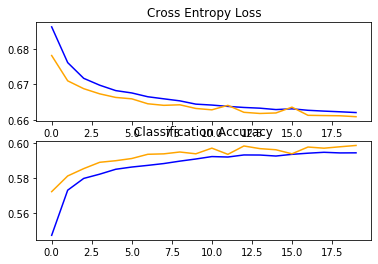

In [157]:
summarize_diagnostics(history6_1)

# E7

In [158]:
folder = 'EnergySplit/E7/'
i = 0
for file in os.listdir(folder):
        i += 1
print(i)

200168


In [159]:
E7 = np.empty((200168, 100, 1), dtype=cp.float64)
labels_E7 = np.zeros(200168)
folder = 'EnergySplit/E7/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E7[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E7[i] = array
    i += 1

In [160]:
E7 = E7/E7.max()

In [161]:
E7X_train, E7X_test, E7Y_train, E7Y_test = train_test_split(E7 , labels_E7 ,test_size=0.2)

In [162]:
model7_1 = Sequential()
model7_1.add(Flatten(input_shape=(100,1)))
model7_1.add(BatchNormalization())
model7_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model7_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model7_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model7_1.add(Dense(1, activation='sigmoid'))

In [163]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model7_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [164]:
history7_1 = model7_1.fit(E7X_train, E7Y_train, batch_size=64, validation_data=(E7X_test, E7Y_test), epochs=20)

Train on 160134 samples, validate on 40034 samples
Epoch 1/20
160134/160134 [==============================] - 7s 47us/step - loss: 0.6898 - accuracy: 0.5355 - val_loss: 0.6844 - val_accuracy: 0.5539
Epoch 2/20
160134/160134 [==============================] - 7s 43us/step - loss: 0.6805 - accuracy: 0.5645 - val_loss: 0.6764 - val_accuracy: 0.5691
Epoch 3/20
160134/160134 [==============================] - 7s 43us/step - loss: 0.6756 - accuracy: 0.5727 - val_loss: 0.6740 - val_accuracy: 0.5751
Epoch 4/20
160134/160134 [==============================] - 7s 41us/step - loss: 0.6737 - accuracy: 0.5767 - val_loss: 0.6728 - val_accuracy: 0.5784
Epoch 5/20
160134/160134 [==============================] - 6s 37us/step - loss: 0.6720 - accuracy: 0.5788 - val_loss: 0.6719 - val_accuracy: 0.5790
Epoch 6/20
160134/160134 [==============================] - 7s 42us/step - loss: 0.6711 - accuracy: 0.5810 - val_loss: 0.6714 - val_accuracy: 0.5819
Epoch 7/20
160134/160134 [=============================

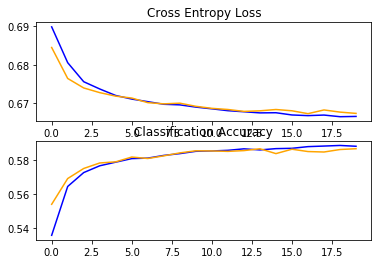

In [165]:
summarize_diagnostics(history7_1)

# E8

In [166]:
folder = 'EnergySplit/E8/'
i = 0
for file in os.listdir(folder):
        i += 1
print(i)

200057


In [167]:
E8 = np.empty((200057, 100, 1), dtype=cp.float64)
labels_E8 = np.zeros(200057)
folder = 'EnergySplit/E8/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E8[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E8[i] = array
    i += 1

In [168]:
E8 = E8/E8.max()

In [169]:
E8X_train, E8X_test, E8Y_train, E8Y_test = train_test_split(E8 , labels_E8 ,test_size=0.2)

In [174]:
model8_1 = Sequential()
model8_1.add(Flatten(input_shape=(100,1)))
model8_1.add(BatchNormalization())
model8_1.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model8_1.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model8_1.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model8_1.add(Dense(1, activation='sigmoid'))

In [175]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model8_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [176]:
history8_1 = model8_1.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=30)

Train on 160045 samples, validate on 40012 samples
Epoch 1/30
160045/160045 [==============================] - 8s 48us/step - loss: 0.6907 - accuracy: 0.5249 - val_loss: 0.6850 - val_accuracy: 0.5572
Epoch 2/30
160045/160045 [==============================] - 7s 46us/step - loss: 0.6817 - accuracy: 0.5599 - val_loss: 0.6772 - val_accuracy: 0.5730
Epoch 3/30
160045/160045 [==============================] - 7s 42us/step - loss: 0.6780 - accuracy: 0.5688 - val_loss: 0.6752 - val_accuracy: 0.5750
Epoch 4/30
160045/160045 [==============================] - 6s 40us/step - loss: 0.6762 - accuracy: 0.5714 - val_loss: 0.6738 - val_accuracy: 0.5766
Epoch 5/30
160045/160045 [==============================] - 7s 41us/step - loss: 0.6752 - accuracy: 0.5728 - val_loss: 0.6730 - val_accuracy: 0.5781
Epoch 6/30
160045/160045 [==============================] - 7s 43us/step - loss: 0.6742 - accuracy: 0.5751 - val_loss: 0.6729 - val_accuracy: 0.5782
Epoch 7/30
160045/160045 [=============================

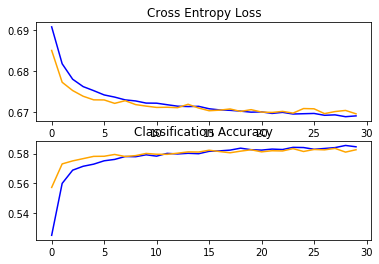

In [177]:
summarize_diagnostics(history8_1)

In [ ]:
fig = plt.figure()
ax = fig.subplots()
ax.set_ylabel('accuracy')
ax.set_xlabel('trained epochs')
plt.plot(history_1.history['accuracy'], color='blue', label='training set')
plt.plot(history_1.history['val_accuracy'], color='orange', label='validation set')
plt.plot(x, y, '--', color='black', label='random classification' )
plt.grid()
plt.legend()
axes = plt.gca()
axes.set_xlim([-2,32])
axes.set_ylim([0.4,1])
#plt.savefig('/home/centos/accuracy.pdf')

In [224]:
tot = [77.70, 70.24, 67.12, 63.87, 61.54, 60.55, 59.84, 58.68, 58.34]
en = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]

In [240]:
ener = np.linspace(0, 9, 10)
ener

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [272]:
x = np.linspace(-0.5, 9.5)
y = 0*x +50

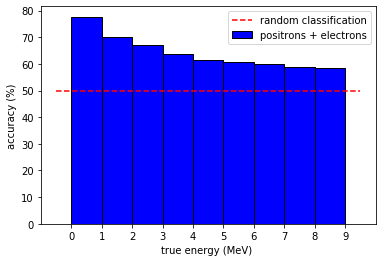

In [274]:
fig = plt.figure()
ax = fig.subplots()
ax.set_ylabel('accuracy (%)')
ax.set_xlabel('true energy (MeV) ')
plt.bar(ener[:-1], tot, width=1, ec='black', align='edge', label='positrons + electrons', color='blue')
plt.plot(x, y, '--', color='red', label='random classification' )
plt.xticks(ener)
#plt.grid()
plt.legend()
#plt.savefig('/home/centos/accuracy_tot.pdf')